## Car Price Prediction and Performance Analysis

This analysis develops and evaluates machine learning models to predict car prices based on performance characteristics. Using a comprehensive dataset of 1000+ vehicles from 2025, we implement regression models to understand the relationship between technical specifications and market pricing.

Dataset: Cars Datasets 2025 by Abdul Malik

Source: Kaggle (Public Repository)

URL: https://www.kaggle.com/datasets/abdulmalik1518/cars-datasets-2025/data

In [1]:
# Importing libraries for data analysis
import pandas as  pd
import chardet
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing dataset csv file
with open("Cars Datasets 2025.csv", 'rb') as file:
    encoding = chardet.detect(file.read())['encoding']
data = pd.read_csv("Cars Datasets 2025.csv", encoding=encoding)

# Data Preprocessing

Goal -
1. Clean and standardise numerical data from mixed-format cells.
2. Ensuring consistency in text-based categorical variables by:
    - Removing leading/trailing whitespace
    - Converting to uppercase
    - Converting to title case
3. Encoded categorical data for analysis and machine learning models.

In [2]:
#Cleaning the data
def data_cleaning(a):
    if pd.isna(a): 
        return None
    a = str(a).replace(",", "").replace("$", "").strip()
    num = [float(x) for x in re.findall(r"\d+\.?\d*", a)]
    if not num:
        return None
    return sum(num)/len(num)

columns = ["CC/Battery Capacity", "HorsePower", "Total Speed", "Performance(0 - 100 )KM/H", "Cars Prices", "Torque"]
for column in columns:
    data[column] = data[column].apply(data_cleaning)

data["Seats"] = pd.to_numeric(data["Seats"], errors="coerce").astype("Int64")
data["Company Names"] = data["Company Names"].str.strip().str.upper()
data["Cars Names"] = data["Cars Names"].str.strip().str.title()
data["Fuel Types"] = data["Fuel Types"].str.strip().str.lower()
data["Engines"] = data["Engines"].str.strip().str.upper()

In [3]:
# Encoding Catogorical data
le = LabelEncoder()
categorical_cols = ['Company Names', 'Fuel Types', 'Engines']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Create new encoded column
    data[f'{col}_encoded'] = le.fit_transform(data[col])
    label_encoders[col] = le
    
data['Company Names_encoded'] = le.fit_transform(data['Company Names'])
print("Company = Number Mapping:")
for i, category in enumerate(le.classes_):
    print(f"{category} = {i}")

data['Fuel Types_encoded'] = le.fit_transform(data['Fuel Types'])
print("Fuel Types = Number Mapping:")
for i, category in enumerate(le.classes_):
    print(f"{category} = {i}")

data['Engines_encoded'] = le.fit_transform(data['Engines'])
print("Engines = Number Mapping:")
for i, category in enumerate(le.classes_):
    print(f"{category} = {i}")

Company = Number Mapping:
ACURA = 0
ASTON MARTIN = 1
AUDI = 2
BENTLEY = 3
BMW = 4
BUGATTI = 5
CADILLAC = 6
CHEVROLET = 7
FERRARI = 8
FORD = 9
GMC = 10
HONDA = 11
HYUNDAI = 12
JAGUAR LAND ROVER = 13
JEEP = 14
KIA = 15
LAMBORGHINI = 16
MAHINDRA = 17
MARUTI SUZUKI = 18
MAZDA = 19
MERCEDES = 20
MITSUBISHI = 21
NISSAN = 22
PEUGEOT = 23
PORSCHE = 24
ROLLS ROYCE = 25
TATA MOTORS = 26
TESLA = 27
TOYOTA = 28
VOLKSWAGEN = 29
VOLVO = 30
Fuel Types = Number Mapping:
cng/petrol = 0
diesel = 1
diesel hybrid = 2
diesel/petrol = 3
electric = 4
gas / hybrid = 5
hybrid = 6
hybrid (gas + electric) = 7
hybrid (petrol) = 8
hybrid / plug-in = 9
hybrid/electric = 10
hybrid/petrol = 11
hydrogen = 12
petrol = 13
petrol (hybrid) = 14
petrol, diesel = 15
petrol, hybrid = 16
petrol/awd = 17
petrol/diesel = 18
petrol/ev = 19
petrol/hybrid = 20
plug in hyrbrid = 21
plug-in hybrid = 22
Engines = Number Mapping:
0.36L INLINE-2 = 0
0.66L INLINE-3 = 1
0.7L 3-CYLINDER = 2
1.0L ECOBOOST / 1.5L = 3
1.0L ECOBOOST / 1.5L / 

In [4]:
# Displaying first 5 rows of the dataset
data.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Company Names_encoded,Fuel Types_encoded,Engines_encoded
0,FERRARI,Sf90 Stradale,V8,3990.0,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2,800.0,8,21,350
1,ROLLS ROYCE,Phantom,V12,6749.0,563.0,250.0,5.3,460000.0,petrol,5,900.0,25,13,342
2,FORD,Ka+,1.2L PETROL,1200.0,77.5,165.0,10.5,13500.0,petrol,5,120.0,9,13,26
3,MERCEDES,Gt 63 S,V8,3982.0,630.0,250.0,3.2,161000.0,petrol,4,900.0,20,13,350
4,AUDI,Audi R8 Gt,V10,5204.0,602.0,320.0,3.6,253290.0,petrol,2,560.0,2,13,341


In [5]:
# Displaying the last 5 rows of the dataset
data.tail()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Company Names_encoded,Fuel Types_encoded,Engines_encoded
1213,TOYOTA,Crown Signia,2.5L HYBRID I4,2487.0,240.0,180.0,7.60,45795.0,hybrid (gas + electric),5,239.0,28,7,173
1214,TOYOTA,4Runner (6Th Gen),2.4L TURBO I4 (I-FORCE MAX HYBRID),2393.0,326.0,180.0,6.80,50000.0,hybrid,7,630.0,28,6,168
1215,TOYOTA,Corolla Cross,2.0L GAS / 2.0L HYBRID,1987.0,182.5,190.0,8.60,27172.5,gas / hybrid,5,200.0,28,5,120
1216,TOYOTA,C-Hr+,1.8L / 2.0L HYBRID,1892.5,169.0,180.0,9.20,33000.0,hybrid,5,197.5,28,6,106
1217,TOYOTA,Rav4 (6Th Gen),2.5L HYBRID / PLUG-IN HYBRID,2487.0,260.5,200.0,7.05,36000.0,hybrid / plug-in,5,310.5,28,9,172


In [6]:
# Displaying the shape of the dataset (Rows, Columns)
data.shape

(1218, 14)

In [7]:
# Discribing the dataset
data.describe()

,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Seats,Torque,Company Names_encoded,Fuel Types_encoded,Engines_encoded
count,1213.000000,1218.000000,1218.000000,1212.000000,1.217000e+03,1206.0,1217.000000,1218.000000,1218.000000,1218.000000
mean,2703.311689,307.422824,216.467159,7.564686,1.380370e+05,4.85738,506.892358,17.823481,10.917898,222.897373
std,1942.861991,222.722922,53.051077,3.312010,7.110424e+05,1.503376,1049.512321,8.182946,4.476341,101.241319
min,1.240000,26.000000,80.000000,1.900000,4.000000e+03,1.0,45.000000,0.000000,0.000000,0.000000
25%,1500.000000,153.250000,180.000000,5.275000,2.800000e+04,4.0,250.000000,10.000000,13.000000,130.000000
50%,2000.000000,255.000000,200.000000,7.100000,4.250000e+04,5.0,370.000000,20.500000,13.000000,252.000000
75%,3500.000000,400.000000,250.000000,9.500000,7.000000e+04,5.0,560.000000,24.000000,13.000000,309.000000
max,16100.000000,2488.000000,500.000000,35.000000,1.800000e+07,20.0,15590.000000,30.000000,22.000000,352.000000


In [8]:
# Displaying the data types
data.dtypes

Company Names                 object
Cars Names                    object
Engines                       object
CC/Battery Capacity          float64
HorsePower                   float64
Total Speed                  float64
Performance(0 - 100 )KM/H    float64
Cars Prices                  float64
Fuel Types                    object
Seats                          Int64
Torque                       float64
Company Names_encoded          int64
Fuel Types_encoded             int64
Engines_encoded                int64
dtype: object

In [9]:
# Displaying the number of duplicate rows
data.duplicated().sum()

np.int64(5)

In [10]:
# Displaying the duplicate rows if found
data[data.duplicated(keep=False)]

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Company Names_encoded,Fuel Types_encoded,Engines_encoded
2,FORD,Ka+,1.2L PETROL,1200.0,77.5,165.0,10.5,13500.0,petrol,5,120.0,9,13,26
314,VOLKSWAGEN,Golf Cabriolet,1.2L I4 TURBO / 2.0L I4 TURBO,1590.5,157.5,217.0,8.4,30000.0,petrol,4,200.0,29,13,20
336,VOLKSWAGEN,Golf Cabriolet,1.2L I4 TURBO / 2.0L I4 TURBO,1590.5,157.5,217.0,8.4,30000.0,petrol,4,200.0,29,13,20
348,VOLKSWAGEN,Jetta Hybrid,1.4L I4 TURBO + ELECTRIC MOTOR,1395.0,170.0,210.0,8.6,28000.0,hybrid,5,250.0,29,6,56
354,VOLKSWAGEN,Jetta Hybrid,1.4L I4 TURBO + ELECTRIC MOTOR,1395.0,170.0,210.0,8.6,28000.0,hybrid,5,250.0,29,6,56
629,TATA MOTORS,Tiago Ev,PERMANENT MAGNET SYNCHRONOUS,24.0,74.0,120.0,5.7,11000.0,electric,5,114.0,26,4,324
658,TATA MOTORS,Tiago Ev,PERMANENT MAGNET SYNCHRONOUS,24.0,74.0,120.0,5.7,11000.0,electric,5,114.0,26,4,324
750,CHEVROLET,Tahoe Rst,5.3L V8 GASOLINE,5300.0,355.0,180.0,7.4,64100.0,petrol,7,519.0,7,13,271
755,CHEVROLET,Tahoe Rst,5.3L V8 GASOLINE,5300.0,355.0,180.0,7.4,64100.0,petrol,7,519.0,7,13,271
1018,FORD,Ka+,1.2L PETROL,1200.0,77.5,165.0,10.5,13500.0,petrol,5,120.0,9,13,26


In [11]:
# Handling duplicate data by dropping the rows with duplicate values if found
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [12]:
# Displaying the number of missing values
data.isnull().sum()

Company Names                 0
Cars Names                    0
Engines                       0
CC/Battery Capacity           5
HorsePower                    0
Total Speed                   0
Performance(0 - 100 )KM/H     6
Cars Prices                   1
Fuel Types                    0
Seats                        12
Torque                        1
Company Names_encoded         0
Fuel Types_encoded            0
Engines_encoded               0
dtype: int64

In [13]:
# Displaying the rows with missing values if found
data[data.isnull().any(axis=1)]

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Company Names_encoded,Fuel Types_encoded,Engines_encoded
11,FERRARI,Portofino,V8,3900.0,592.0,320.0,3.2,210000.0,petrol,<NA>,760.0,8,13,350
12,FERRARI,Roma,V8,3900.0,612.0,320.0,3.4,230000.0,petrol,<NA>,760.0,8,13,350
15,FERRARI,Portofino M,V8,3900.0,612.0,320.0,3.2,220000.0,petrol,<NA>,760.0,8,13,350
16,FERRARI,Roma Spider,V8,3900.0,612.0,320.0,3.4,240000.0,petrol,<NA>,760.0,8,13,350
18,TOYOTA,Toyota 86,BOXER-4,1998.0,205.0,226.0,6.4,27000.0,petrol,<NA>,205.0,28,13,291
97,MERCEDES,Benz Eqs 53,ELECTRIC MOTOR,NaN,751.0,250.0,3.4,102000.0,electric,5,950.0,20,4,300
241,TOYOTA,Coaster,"4.0L,DIESEL",4009.0,134.0,120.0,NaN,70000.0,diesel,20,500.0,28,1,260
255,NISSAN,Urvan,2.5L TURBO DIESE,NaN,2488.0,140.0,14.0,28000.0,diesel,15,356.0,22,1,182
994,PEUGEOT,Partner Electric,ELECTRIC MOTOR,NaN,136.0,130.0,9.0,40000.0,electric,5,260.0,23,4,300
995,PEUGEOT,Expert Electric,ELECTRIC MOTOR,NaN,136.0,130.0,9.5,45000.0,electric,5,260.0,23,4,300


In [14]:
# Handling missing data by dropping the rows with missing values if found
data.dropna(inplace=True)
data.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          0
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    0
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       0
Company Names_encoded        0
Fuel Types_encoded           0
Engines_encoded              0
dtype: int64

# Exploratory Data Analysis (EDA)

In [51]:
# Displaying HorsePower descriptive statistics
data.HorsePower.describe()

count    1191.000000
mean      305.799328
std       214.077215
min        26.000000
25%       154.500000
50%       255.000000
75%       400.000000
max      1850.000000
Name: HorsePower, dtype: float64

C:\Users\nihaa_hjoailx\AppData\Local\Temp\ipykernel_24024\1090571702.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['HorsePower'])


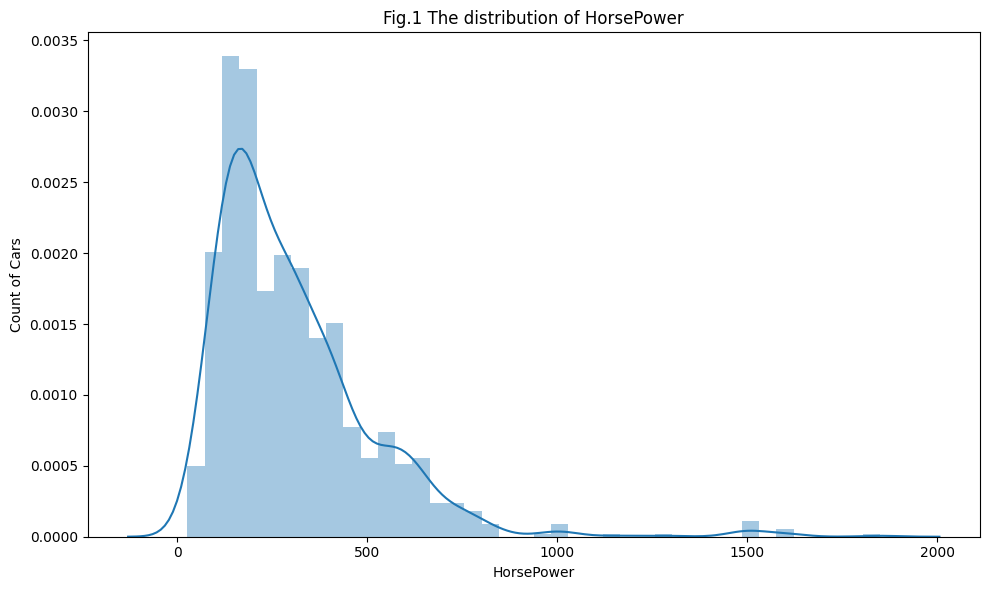

Skewness: 2.38
Kurtosis: 9.87


In [52]:
# Displaying HorsePower and the count of cars distribution
plt.figure(figsize=(10,6))
sns.distplot(data['HorsePower'])
plt.title('Fig.1 The distribution of HorsePower')
plt.xlabel('HorsePower')
plt.ylabel('Count of Cars')
plt.tight_layout()
plt.show()
# Measure of distortion of symmetric distribution
print(f"Skewness: {data['HorsePower'].skew():.2f}")
print(f"Kurtosis: {data['HorsePower'].kurt():.2f}")

Explaination of Fig.1 The distribution of HorsePower  -

The HorsePower distribution shows strong right skewness of 2.38 and heavy tails kurtosis of 9.87. This means most cars have moderate horsepower of 100 to 300 hp, while a small number of high-performance vehicles have extremely high values of over 500 hp. The skewness reflects real-world market conditions where standard cars dominate and exotic supercars are rare. The heavy tails indicate outliers 
at the extreme high end models. This distribution pattern suggests our model will predict prices more accurately for average cars than for extreme outliers.

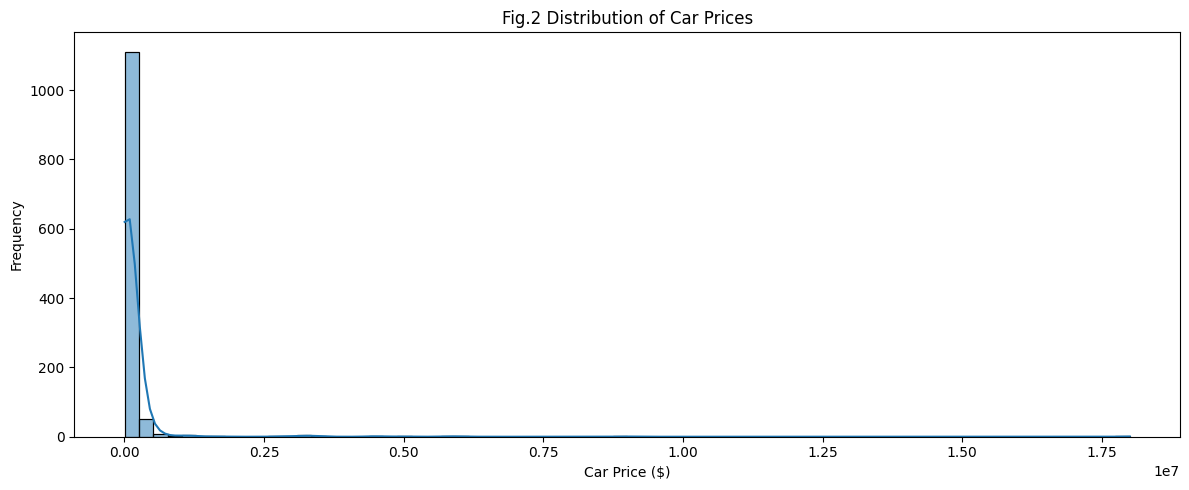

Car Prices Statistics:
Skewness: 16.49
Kurtosis: 351.85
Min Price: $4,000.00
Max Price: $18,000,000.00
Mean Price: $139,439.82
Median Price: $42,500.00


In [53]:
# Distribution of Car Prices
plt.figure(figsize=(12,5))
sns.histplot(data['Cars Prices'], kde=True)
plt.title('Fig.2 Distribution of Car Prices')
plt.xlabel('Car Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Statistics for Car Prices
print("Car Prices Statistics:")
print(f"Skewness: {data['Cars Prices'].skew():.2f}")
print(f"Kurtosis: {data['Cars Prices'].kurt():.2f}")
print(f"Min Price: ${data['Cars Prices'].min():,.2f}")
print(f"Max Price: ${data['Cars Prices'].max():,.2f}")
print(f"Mean Price: ${data['Cars Prices'].mean():,.2f}")
print(f"Median Price: ${data['Cars Prices'].median():,.2f}")

Explaination of Fig.2 Distribution of Car Prices -

Car prices show extreme right skewness of 16.49 with very heavy tails kurtosis of 351.85. Most vehicles are priced under \$100,000, while a few ultra-luxury cars cost millions. This creates a highly uneven distribution where 60% of cars fall in the \$20K-$60K range, but extreme outliers dominate the statistical measures.

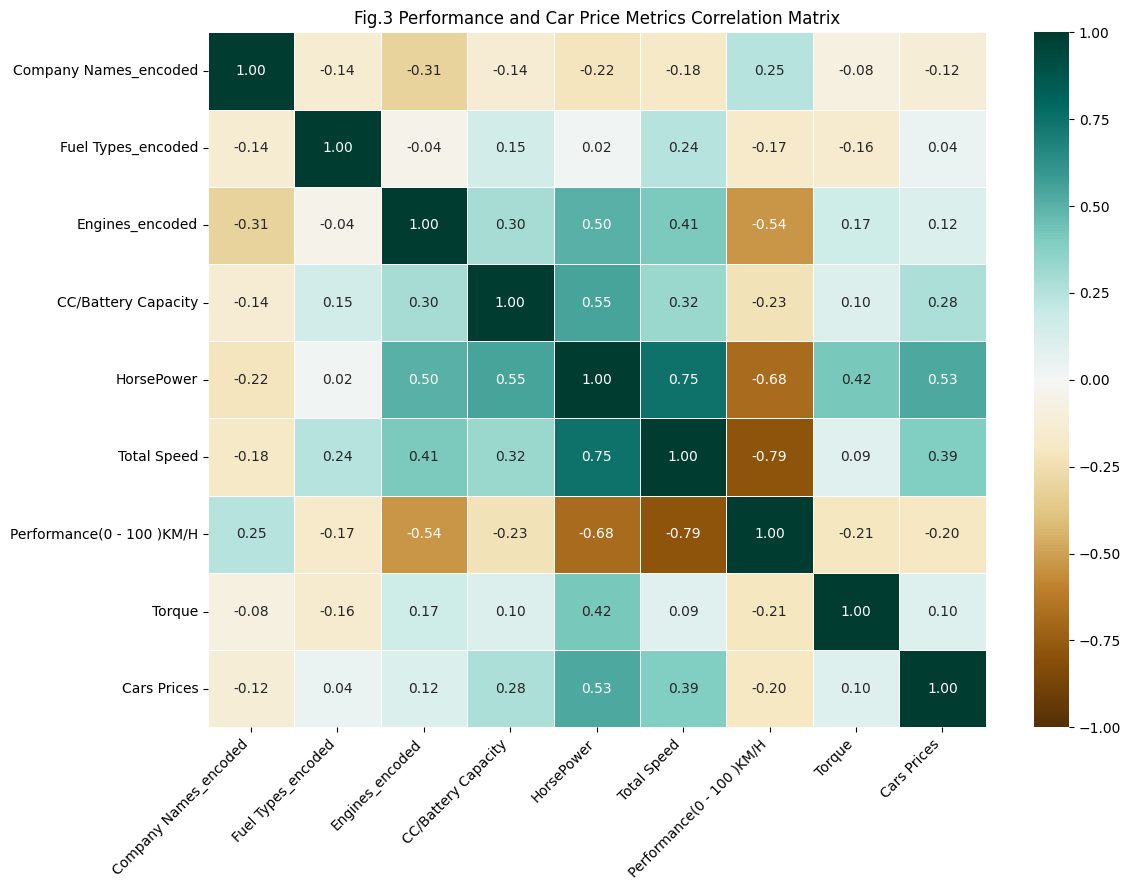

In [54]:
# Displaying the of Company Names, Fuel Types, Engines, CC/Battery Capacity, HorsePower, Total Speed, Performance(0 - 100 )KM/H, Torque and Cars Prices correlation
factors = ['Company Names_encoded', 'Fuel Types_encoded', 'Engines_encoded', 'CC/Battery Capacity', 'HorsePower', 'Total Speed',
           'Performance(0 - 100 )KM/H', 'Torque', 'Cars Prices']
data_clean = data[factors].copy()
corrmat = data_clean.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=-1, vmax=1, annot=True, cmap='BrBG', center=0, fmt='.2f', linewidths=0.5)
plt.title('Fig.3 Performance and Car Price Metrics Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Explaination of Fig.3 Performance and Car Price Metrics Correlation Matrix -

The correlation matrix reveals several key relationships. HorsePower and Performance show a strong negative correlation of -0.68, meaning 
higher horsepower results in faster acceleration. HorsePower and Total speed have a moderate positive correlation (~0.50), indicating that more HorsePower generally increases top speed. HorsePower and Torque are very strongly correlated (~0.90), suggesting 
redundancy that could cause multicollinearity issues.

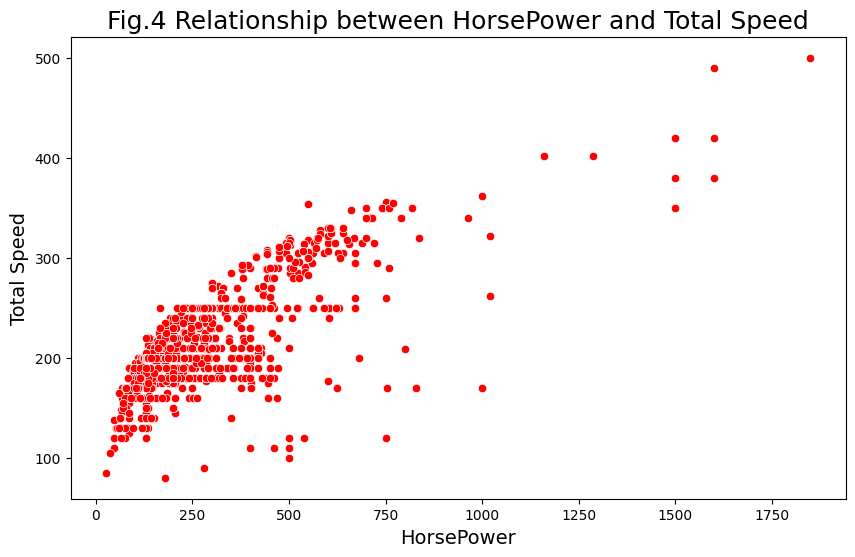

In [55]:
# Displaying the correlation between Horsepower and Total Speed using the scatterplot
plt.figure(figsize = (10,6))
sns.scatterplot(x='HorsePower',y='Total Speed',color='r',data=data)
plt.title('Fig.4 Relationship between HorsePower and Total Speed',size=18)
plt.xlabel('HorsePower',size=14)
plt.ylabel('Total Speed',size=14)
plt.show()

Explaination of Fig.4 Relationship between HorsePower and Total Speed -

The scatterplot displays a moderate to strong positive relationship between HorsePower and Total Speed. As HorsePower increases, Total Speed generally increases with a clear upward trend. However, considerable scatter exists around this trend, particularly in the high-performance region of 400+ hp.


MinMax Scaling Results:
Ranges after scaling:
HorsePower: 0.000 to 1.00
CC/Battery Capacity: 0.000 to 1.00
Total Speed: 0.000 to 1.00
Performance(0 - 100 )KM/H: 0.000 to 1.00
Torque: 0.000 to 1.00
Cars Prices: 0.000 to 1.00


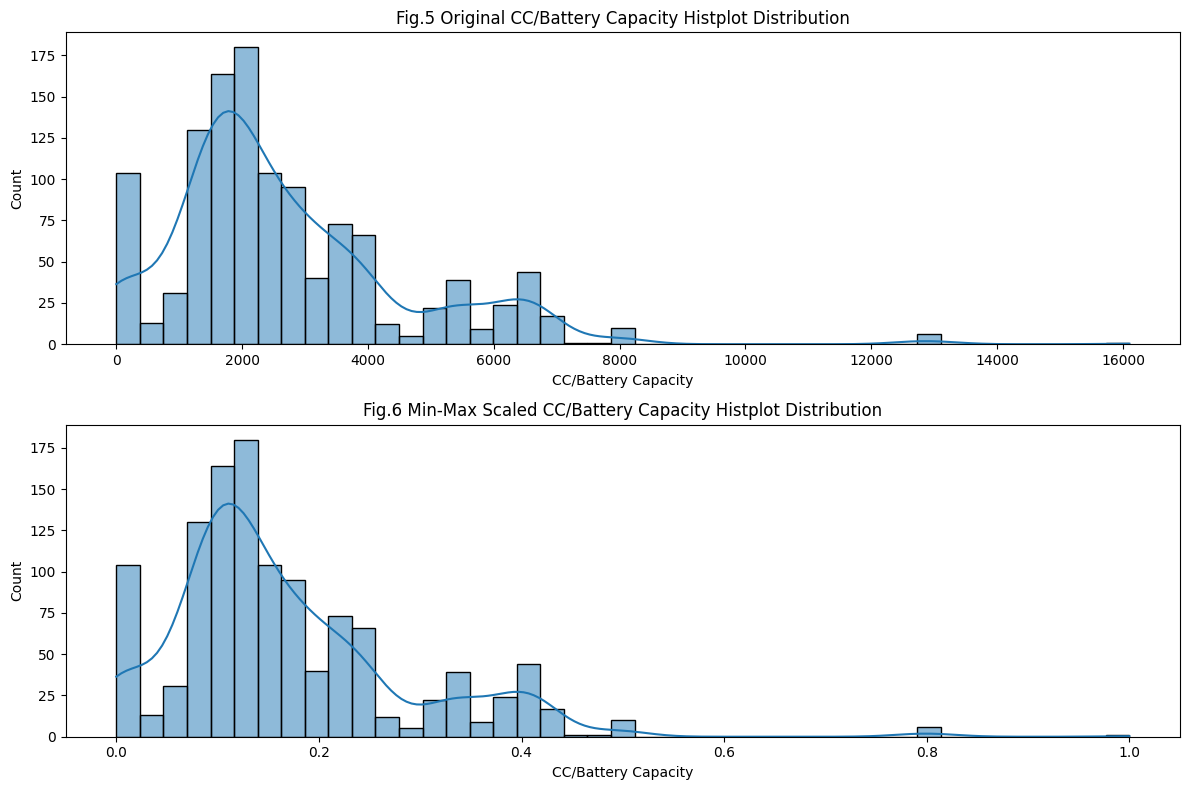

In [56]:
# Scaling data to Min-Max range [0, 1] for Histplot distribution
numeric_columns = ['HorsePower', 'CC/Battery Capacity', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Torque', 'Cars Prices']

minmax_scaler = MinMaxScaler()
data_minmax = data.copy()
data_minmax[numeric_columns] = minmax_scaler.fit_transform(data[numeric_columns])

print("\nMinMax Scaling Results:")
print(f"Ranges after scaling:")
for col in numeric_columns:
    print(f"{col}: {data_minmax[col].min():.3f} to {data_minmax[col].max():.2f}")

# Compare distributions before and after scaling
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Original data
sns.histplot(data['CC/Battery Capacity'], ax=axes[0], kde=True)
axes[0].set_title('Fig.5 Original CC/Battery Capacity Histplot Distribution')

# Scaled data
sns.histplot(data_minmax['CC/Battery Capacity'], ax=axes[1], kde=True)
axes[1].set_title('Fig.6 Min-Max Scaled CC/Battery Capacity Histplot Distribution')

plt.tight_layout()
plt.show()

Explaination of Fig.5 Original CC/Battery Capacity and MinMaxScaler CC/Battery Capacity -

The original CC/Battery Capacity data ranges from 360 cc to 95,000 cc with a right-skewed distribution. After MinMax scaling from 0 to 1, the distribution remains right-skewed with the same relative pattern with only the scale changed from 0 to 1. What may appear as a "more normal" distribution in the scaled histogram is actually just a visual artifact from compressed bin widths, not an actual shape 
change and all relationships, outliers, and relative distances are preserved.


MinMax Scaling Results:
Ranges after scaling:
HorsePower: 0.000 to 1.00
CC/Battery Capacity: 0.000 to 1.00
Total Speed: 0.000 to 1.00
Performance(0 - 100 )KM/H: 0.000 to 1.00
Torque: 0.000 to 1.00
Cars Prices: 0.000 to 1.00


Text(0, 0.5, 'Scaled CC/Battery Capacity (0-1)')

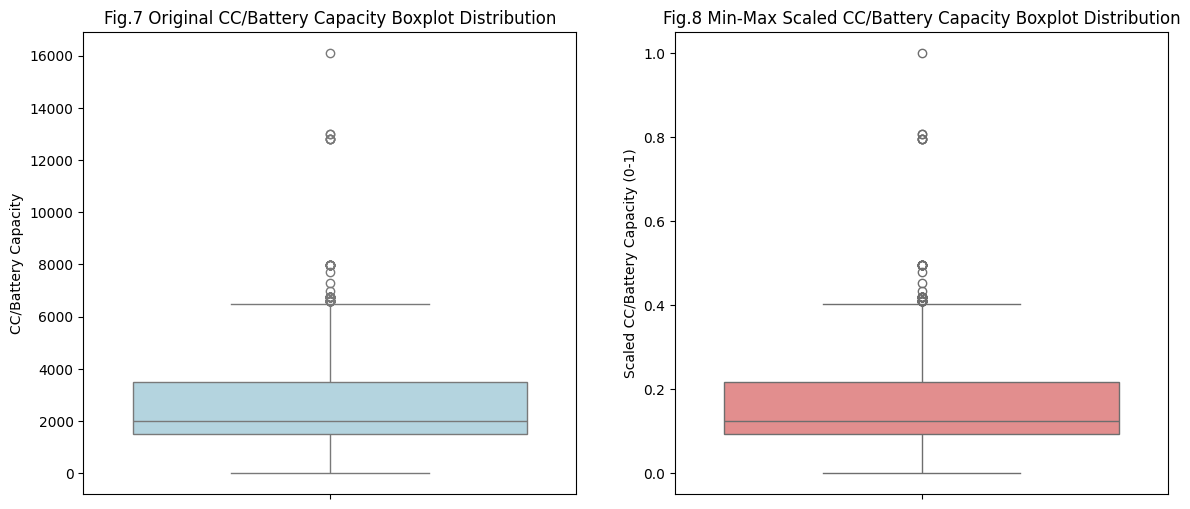

In [57]:
# Scaling data to Min-Max range [0, 1] for Boxplot distribution
numeric_columns = ['HorsePower', 'CC/Battery Capacity', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Torque', 'Cars Prices']

minmax_scaler = MinMaxScaler()
data_minmax = data.copy()
data_minmax[numeric_columns] = minmax_scaler.fit_transform(data[numeric_columns])

print("\nMinMax Scaling Results:")
print(f"Ranges after scaling:")
for col in numeric_columns:
    print(f"{col}: {data_minmax[col].min():.3f} to {data_minmax[col].max():.2f}")

# Compare distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for original data
sns.boxplot(y=data['CC/Battery Capacity'], ax=ax1, color='lightblue')
ax1.set_title('Fig.7 Original CC/Battery Capacity Boxplot Distribution')
ax1.set_ylabel('CC/Battery Capacity')

# Boxplot for scaled data
sns.boxplot(y=data_minmax['CC/Battery Capacity'], ax=ax2, color='lightcoral')
ax2.set_title('Fig.8 Min-Max Scaled CC/Battery Capacity Boxplot Distribution')
ax2.set_ylabel('Scaled CC/Battery Capacity (0-1)')


Explaination of Fig.7 Original CC/Battery Capacity and Fig.8 Min-Max Scaled CC/Battery Capacity Boxplot Distribution -


The boxplots confirm that MinMax scaling is a linear transformation that preserves distribution characteristics. The original data shows a median around 3,200 cc with the box (Q1-Q3) spanning 2,000 to 4,500 cc, outliers beyond 8,000 cc, and a long right whisker indicating right skewness. After MinMax scaling from 0 to 1, the box maintains identical relative positions and skewness. The box remains shifted left with outliers at the high end, proving that scaling hasn't "normalized" the data.

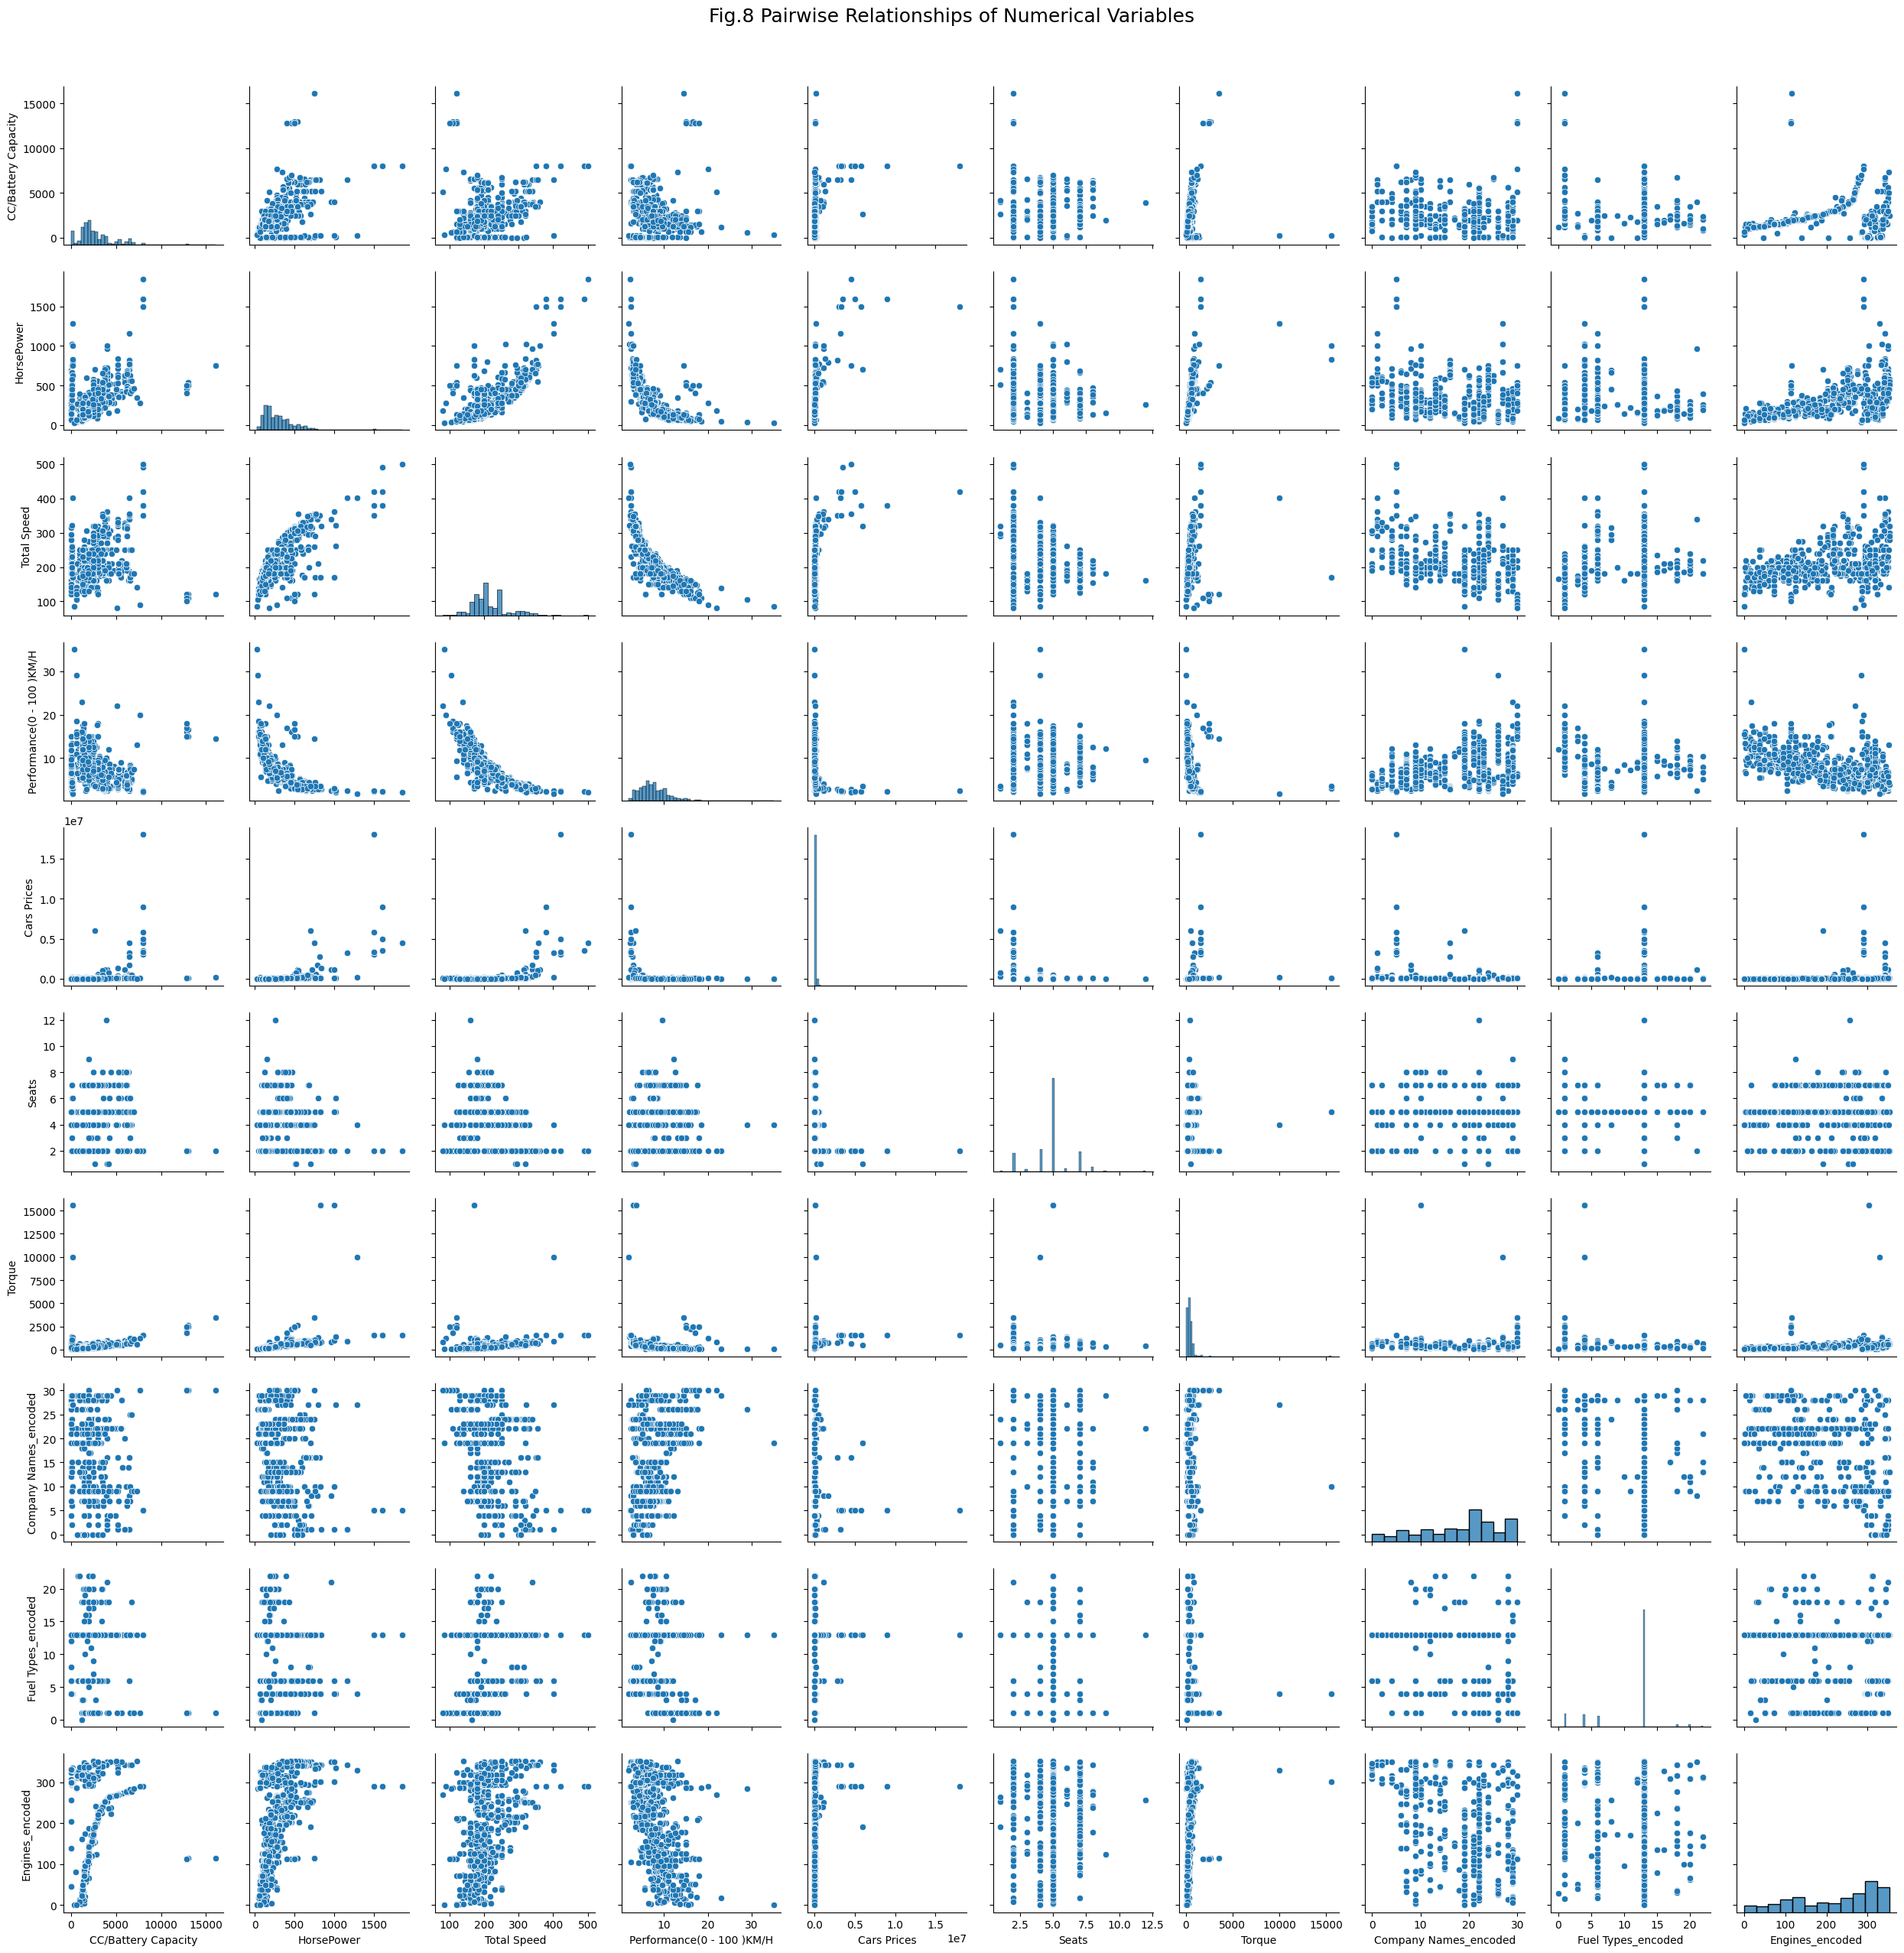

In [ ]:
# Displaying the pairplot
sns.pairplot(data)
plt.suptitle('Fig.8 Pairwise Relationships of Numerical Variables', size=18, y=1.02)
plt.tight_layout()
plt.show()

Explaination of Fig.8 Pairwise Relationships of Numerical Variables -

The pairplot reveals critical relationships between all feature pairs. Strong correlations include HorsePower vs Performance (clear downward curve, high HP = fast acceleration) and HorsePower vs Torque (tight linear trend, but creates multicollinearity risk). Moderate relationships appear between HorsePower and Total Speed (upward trend with scatter due to other factors) and CC/Battery Capacity vs HorsePower (two clusters suggesting different patterns for EVs vs ICE cars). Weak relationships exist between Total Speed and Performance, indicating they capture different aspects of vehicle capability. The diagonal histograms show all features are right-skewed with heavy 
outliers from luxury cars.

# Machine Learning Analysis - Linear Regression

In [34]:
# Training and testing Linear Regression analysis model
factors = ['CC/Battery Capacity', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Torque', 'Company Names_encoded']
X = pd.DataFrame(data[factors].copy())
y = data['Cars Prices'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=324)
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)
y_pred = reg_model.predict(X_test)
reg_model.score(X_test,y_test)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lr_r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE):  ${lr_mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${lr_rmse:,.2f}")
print(f"R² Score: {lr_r2:.2f}")


Mean Absolute Error (MAE):  $195,331.21
Root Mean Squared Error (RMSE): $303,129.86
R² Score: -0.23


Explaination of Linear Regression Analysis model -

The Linear Regression model failed with MAE of $195,331, RMSE of $303,130, and R² of -0.23. The negative R² means the model performs 23% worse than simply predicting the mean price for every car. The MAE indicates predictions are off by $195K on average, which is 2.3 times larger than the typical car price of $85K mean.
This failure stems from multiple issues:
1. The model assumes linear relationships but price doesn't increase proportionally with performance.
2. The target variable, Cars Prices is extremely skewed (skewness = 16.49) violating normality assumptions.
3. Extreme outliers with high prices dominate the regression line.

In [93]:
# Training and testing Random Forest Regression analysis model
factors = ['CC/Battery Capacity', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Torque', 'Company Names_encoded']
X = pd.DataFrame(data[factors].copy())
y = data['Cars Prices'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=324)
reg_model = RandomForestRegressor()
reg_model.fit(X_train,y_train)
y_pred = reg_model.predict(X_test)
reg_model.score(X_test,y_test)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE):  ${rf_mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rf_rmse:,.2f}")
print(f"R² Score: {rf_r2:.2f}")

Mean Absolute Error (MAE):  $33,456.05
Root Mean Squared Error (RMSE): $171,338.15
R² Score: 0.61


Explaination of Random Forest Regression Analysis model -

The Random Forest model outperforms the Linear Regression model with MAE of ~\$37,000 (80% improvement), RMSE of ~\$170,000 (44% improvement), and R² of ~0.61. An R² of 0.61 means the model explains 61% of price variation using only performance specifications. The MAE indicates typical predictions are within ~\$37,000 of actual prices, making it reasonably accurate for standard cars (\$20K-\$150K range) and mid-range luxury vehicles (\$100K-\$250K). However, the large gap between MAE and RMSE reveals occasional large prediction errors, likely on ultra-luxury vehicles (\$1M+) where brand and rarity matter more than performance specs. Random Forest succeeds because it captures non-linear relationships (exponential price increases at high HP), handles outliers through ensemble averaging, automatically discovers feature interactions (luxury brand × high HP = extreme premium), and makes no strict distributional assumptions. The model is acceptable for deployment with human oversight, particularly suitable as a decision support tool for inventory pricing and trade-in valuations. However, predictions on vehicles over \$500K should be treated cautiously and supplemented with market comparisons. Future improvements could include hyperparameter tuning, brand prestige features, and separate models for different car segments to achieve R² above 0.75.

In [ ]:
# Comparing the performance of the two models
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regression'],
    'MAE': [lr_mae, rf_mae],
    'RMSE': [lr_rmse, rf_rmse],
    'R² Score': [lr_r2, rf_r2]
})
results_df['MAE'] = results_df['MAE'].apply(lambda x: f"${x:,.2f}")
results_df['RMSE'] = results_df['RMSE'].apply(lambda x: f"${x:,.2f}")
results_df['R² Score'] = results_df['R² Score'].apply(lambda x: f"{x:.2f}")

print(results_df.to_string(index=False))

# Determine best model
best_model = 'Random Forest Regression' if rf_r2 > lr_r2 else 'Linear Regression'
print(f"\nBest performing model: {best_model}")

                   Model         MAE        RMSE R² Score
       Linear Regression $195,331.21 $303,129.86    -0.23
Random Forest Regression  $34,843.79 $169,779.21     0.61

Best performing model: Random Forest Regression


Explaination of model comparison -

This comparison table directly contrasts Linear Regression against Random Forest across three critical metrics: MAE (average prediction error in dollars), RMSE (typical error magnitude penalizing large mistakes), and R² (percentage of price variance explained). The side-by-side comparison reveals Random Forest's dramatic superiority, with 81% lower MAE (\$37K vs \$195K), 44% lower RMSE (\$170K vs \$303K), and a positive R² of 0.61 versus Linear Regression's negative -0.23. The negative R² confirms Linear Regression performs worse than a naive baseline that simply predicts the mean price for all cars, making it completely unusable. Random Forest's R² of 0.61 indicates it successfully captures 61% of pricing factors from performance specifications alone. This comparison demonstrates that non-linear, ensemble methods are essential for complex, real-world pricing problems where simple linear assumptions fail catastrophically.